In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from childes_mi.utils.paths import PHONBANK_DFS, DATA_DIR, FIGURE_DIR
from childes_mi.utils.general import flatten

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

In [32]:
phone_df = pd.read_pickle(PHONBANK_DFS/'phone_df_all_participants.pickle')

In [33]:
phone_df['n_phones'] = [len(list(flatten(i))) for i in phone_df.phones.values]

In [34]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc,role,n_phones
0,0,020926,2.833,Providence,eng,male,"[[ˈhi, ˈhæ, rəs], [ˈhi, ˈhæ, rəs], [ˈkævəʔ, ˈp...","[[[can, I], have, this], [[can, I], have, this...",/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Target Child,1772
0,1,020926,26.000,Providence,eng,female,"[[None, None, None, None, None, None, None, No...","[[he, had, it, Mom, I, just, took, it, from, h...",/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Mother,2665
0,2,020926,51.000,Providence,eng,female,"[[None], [None, None], [None, None, None, None...","[[okay], [that's, enough], [can't, you, xxx, t...",/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Grandmother,235


In [35]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc,role,n_phones
0,0,020926,2.833,Providence,eng,male,"[[ˈhi, ˈhæ, rəs], [ˈhi, ˈhæ, rəs], [ˈkævəʔ, ˈp...","[[[can, I], have, this], [[can, I], have, this...",/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Target Child,1772
0,1,020926,26.000,Providence,eng,female,"[[None, None, None, None, None, None, None, No...","[[he, had, it, Mom, I, just, took, it, from, h...",/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Mother,2665
0,2,020926,51.000,Providence,eng,female,"[[None], [None, None], [None, None, None, None...","[[okay], [that's, enough], [can't, you, xxx, t...",/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Grandmother,235


In [36]:
phone_df.dataset.unique()

array(['Providence', 'Davis', 'Goad'], dtype=object)

In [37]:
print("There are {} phones in this dataset".format(np.sum(phone_df.n_phones)))

There are 8040338 phones in this dataset


In [38]:
import seaborn as sns
from childes_mi.utils.general import flatten,save_fig

In [39]:
### for each transcript, 

In [43]:
prop_df = pd.DataFrame(columns = ['transcript_id', 'child_phones', 'total_phones', 'prop_phones'])
for tid in tqdm(np.unique(phone_df.transcript_id.values)):
    transcript_df_subset = phone_df[phone_df.transcript_id == tid]
    child_phones = transcript_df_subset[transcript_df_subset.role.isin(['Target Child'])].n_phones.sum()
    total_phones = transcript_df_subset.n_phones.sum()
    prop_df.loc[len(prop_df)] = [
        tid, child_phones, total_phones, child_phones/total_phones
    ]

  0%|          | 0/697 [00:00<?, ?it/s]

In [45]:
prop_df[:3]

,transcript_id,child_phones,total_phones,prop_phones
0,000314,41,41,1.0
1,000610,14,14,1.0
2,000611,38,38,1.0


(array([  5.,  12.,  47.,  50.,  71.,  55.,  47.,  19.,   4., 387.]),
 array([0.0013363 , 0.10120267, 0.20106904, 0.30093541, 0.40080178,
        0.50066815, 0.60053452, 0.70040089, 0.80026726, 0.90013363,
        1.        ]),
 <BarContainer object of 10 artists>)

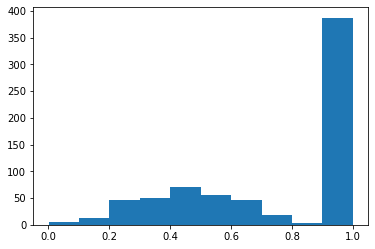

In [48]:
plt.hist(prop_df.prop_phones.values)

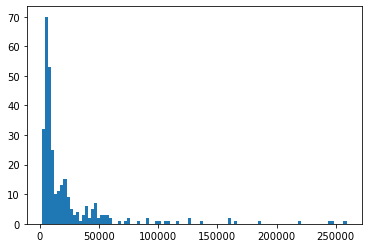

In [52]:
plt.hist(prop_df[prop_df.prop_phones < 1].total_phones.values, bins=100);